# Procesos estocásticos en tiempo continuo

El ajuste a datos reales se logra con reescalamiento y combinación de procesos simulados de Weiner.
Empiezo por simulación de procesos individuales.


# Movimiento Browniano

### Convenciones:
Matriz de d trayectorias de una serie de n tiempos será matriz d x n. 


Trayectoria==individuo, cada tiempo una variable

Simulación de browniano:
$$B_{t+1}=B_t+\sqrt{t} Z_t, \quad Z_t~N(0,1)$$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional
import brownian_motion as bm

size dB:  10001
Size B:  10001


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

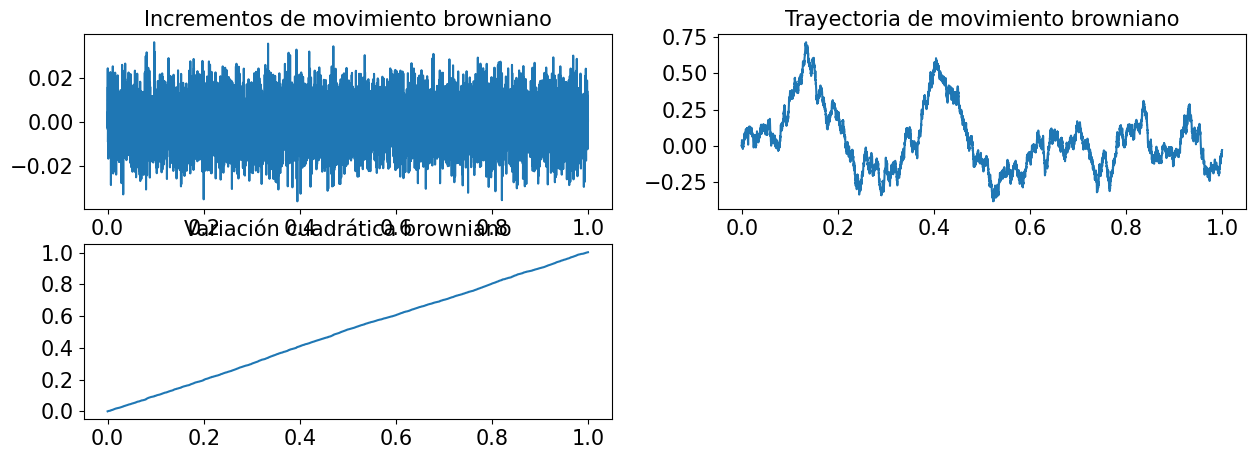

In [2]:
#simulación individual

T=1#Horizonte de tiempo
n=10000 # num de subintervalos
d=5
time=np.linspace(0,T,n+1)#Con n+1 puntos obtengo 0=t_0<...<t_n=T, n subintervalos
Ts=T/n

dB=bm.get_dB(n+1,Ts=Ts,random_state=5)
print("size dB: ", dB.size)
B=bm.get_B(n+1,Ts=Ts,random_state=5) 
print("Size B: ", B.size)


# dB = get_dB(1_000)
# B  = get_B(1_000)

fig = plt.figure(figsize=(15, 5))

title = "Incrementos de movimiento browniano"
plt.subplot(2, 2, 1)
plt.plot(time,dB.T) #basta plt.plot(dB.T) si el Ts=1
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

title = "Trayectoria de movimiento browniano"
plt.subplot(2, 2, 2)
plt.plot(time, B.T)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

title = "Variación cuadrática browniano"
plt.subplot(2, 2, 3)
plt.plot(time,bm.quadratic_variation(B).T)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)




### Correlacionados y matriz de d trayectorias
$W_3$ correlacionado con $W_1$. Con la relación $$dW_3(t)=\rho dW_1(t)+\sqrt{1-\rho^2}dW_2(t)$$
Se tiene que $corr(W_1,W_3)=\rho$.

Usualmente necesitaré múltiplos procesos. El segundo proceso correlacionado por $\rho$ con el primero, el segundo correlacionado por $\rho$ con una elección aleatoria de los procesos ya generados. Simularé una matriz con cada columna como un proceso browniano. 

La matriz será (dxn). Con $\rho=0$ o None, tengo d trayectorias independientes.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9')])

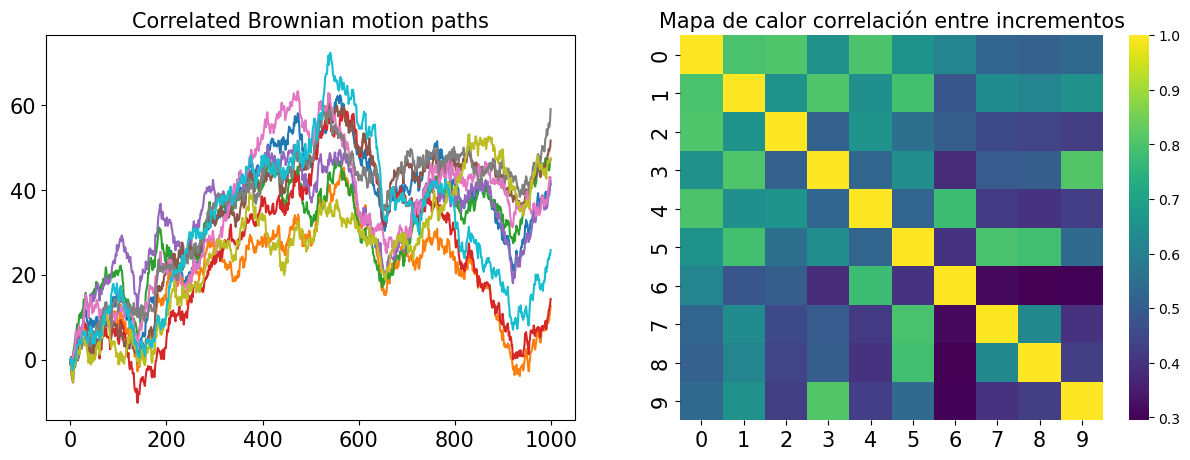

In [3]:
T = 1_000
n_procs = 10
rho = 0.8

corr_Bs = bm.get_B_matrix(T, n_procs,rho=rho)
corr_dBs=bm.dif_B(corr_Bs)
#Plot
fig = plt.figure(figsize=(15, 5))

# paths
title = "Correlated Brownian motion paths"
plt.subplot(1, 2, 1)
plt.plot(corr_Bs.T)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# correlation
title = "Mapa de calor correlación entre incrementos"
plt.subplot(1, 2, 2)
# sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
sns.heatmap(np.corrcoef(corr_dBs, rowvar=True), cmap="viridis")
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# title = "Mapa de calor correlación entre trayectorias"
# plt.subplot(1, 2, 2)
# sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
# plt.gca().set_title(title, fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)



# Movimientos asociados
##Movimiento browniano bridge   


In [ ]:
###Medidas de error:
def mse(y:np.array,y_hat:np.array,)->float:
    return np.mean(np.square(y-y_hat))

def mae(y:np.array,y_hat:np.array,)->float:
    return np.mean(np.abs(y-y_hat))

def get_bridge(n:int,d:int=1,random_state: Optional[int]=None)->np.array:
    B=bm.get_dB_matrix(n,d,random_state=random_state)
    time=np.linspace(0,1,n)
    bridge=

In [9]:
np.array([[1,3,5,7],
          [1,2,4,6],
          [1,9,11,13]])


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])